<a href="https://colab.research.google.com/github/AlinaChernovskaya/customer-churn-prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://static.tildacdn.com/tild3965-3436-4036-b565-393930623934/tg.jpg" width=1201 height=631/></p>

<h3 style="text-align: center;"><b>MIPT FPMI Deep Learning School</b></h3>

<h3 style="text-align: center;"><b>Homework. Advanced Track.</b></h3>

This homework assignment will focus on a comprehensive solution to a machine learning problem.


There are two parts to this homework assignment:
* Create a comprehensive report of your work: how you processed the data, which models you tried, and the results you obtained (maximum 10 points). A certain number of points will be awarded for each completed part.
* Submit your best solution to the competition on [Kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (maximum 5 points). Points will be awarded for achieving specific thresholds.

**Both parts will be peer-reviewed. This means that several other students will review your submission on Stepik, and the aggregation of their ratings will be assigned. At the same time, you will also need to review submissions from several other students.**

**Please ensure that your work is clean and understandable to facilitate review. If you encounter any problems with the solution or need advice, feel free to reach out to our Telegram chat or DM @runfme. If you wish to appeal your score, please DM @runfme.**

**In all instructions, this is the minimum set of things to do. If you can improve any step or add something of your own, feel free to do so!**

# How to review?

Assign full points if all recommendations are followed or if something more interesting and challenging is done. Deduct 1 point for each missing item from the recommendations.


# Metric

Before solving any task, it is important to understand how your solution will be evaluated. In this case, we use the standard ROC-AUC metric for classification tasks. It can be computed using only predicted probabilities and true classes without a specific classification threshold + it works even if the classes in the data are highly imbalanced (examples of one class are tens of times more than examples of the other class). That's why it is very convenient for competitions.

Calculating it is easy:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Part One. Exploration.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Loading (2 points)

1) Look at random rows.

2) Check for missing values (NaNs) in the dataset using data.isna() or data.info(), and if necessary, replace them with something. It would be good if you could create a table showing the number of NaNs in each column.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (3).csv


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Numerical Features
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorical Features
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# Let's look at random rows
data.sample(7)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3999,12,54.20,690.5,Female,0,Yes,No,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),0
2076,2,100.20,198.5,Male,0,No,No,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,0
4170,1,69.85,69.85,Female,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
5190,71,108.60,7690.9,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),1
16,52,53.75,2790.65,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Electronic check,0
4443,57,97.55,5598,Male,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
2959,60,53.60,3237.05,Female,0,No,No,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Electronic check,0


In [ ]:
# Check for Missing Values
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
# Now let's check for spaces and tabs
data.where(data != ' ', inplace=True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data.where(data != '\t', inplace=True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
# Record the indices of NaN values from the TotalSpent column
index = np.where(pd.isnull(data))

In [ ]:
# Using CatBoost to predict the TotalSpent values in order to fill missing values with predicted values
!pip install catboost
from catboost import CatBoostRegressor
model_Total_Spent = CatBoostRegressor(cat_features=cat_cols)
train_Total_Spent_X = data[feature_cols][data.TotalSpent.isna() == False].drop(["TotalSpent"], axis=1)
train_Total_Spent_y = data[feature_cols][data.TotalSpent.isna() == False].TotalSpent
test_Total_Spent_X = data[feature_cols][data.TotalSpent.isna()].drop(["TotalSpent"], axis=1)
model_Total_Spent.fit(train_Total_Spent_X, train_Total_Spent_y)
predict = model_Total_Spent.predict(test_Total_Spent_X)

Learning rate set to 0.052472
0:	learn: 2156.9312406	total: 15.4ms	remaining: 15.4s
1:	learn: 2050.3102068	total: 31.3ms	remaining: 15.6s
2:	learn: 1952.6035620	total: 45.9ms	remaining: 15.3s
3:	learn: 1859.0764999	total: 60.1ms	remaining: 15s
4:	learn: 1772.4615350	total: 72.4ms	remaining: 14.4s
5:	learn: 1686.5690643	total: 87.3ms	remaining: 14.5s
6:	learn: 1606.8115693	total: 100ms	remaining: 14.2s
7:	learn: 1528.9311395	total: 114ms	remaining: 14.1s
8:	learn: 1454.2779959	total: 128ms	remaining: 14.1s
9:	learn: 1387.9390210	total: 142ms	remaining: 14.1s
10:	learn: 1322.3598494	total: 157ms	remaining: 14.1s
11:	learn: 1261.0837484	total: 171ms	remaining: 14s
12:	learn: 1200.1609588	total: 183ms	remaining: 13.9s
13:	learn: 1144.0329332	total: 200ms	remaining: 14.1s
14:	learn: 1089.2161729	total: 215ms	remaining: 14.1s
15:	learn: 1038.8738101	total: 229ms	remaining: 14.1s
16:	learn: 990.3698371	total: 243ms	remaining: 14.1s
17:	learn: 944.2495456	total: 257ms	remaining: 14s
18:	learn:

In [ ]:
# Replace NaN values with predicted values
for i in range(len(predict)):
  data.iloc[index[0][i], index[1][i]] = predict[i]
# Check that there are no missing values now
data.TotalSpent.isna().sum()


0

In [ ]:
# Change the data type of TotalSpent (currently object, but it stores numerical values)
data['TotalSpent'] = data.TotalSpent.astype('float')

## Data Analysis (3 points)

1) For numerical features, plot a histogram (*plt.hist(...)*) or a boxplot (*plt.boxplot(...)*). For categorical features, calculate the count of each value for each feature. For each column, use *data.value_counts()* and plot bar charts (*plt.bar(...)*) or pie charts (*plt.pie(...)*). It would be good if you could do this on one figure using *plt.subplots(...)*.

2) Look at the distribution of the target variable and determine if the classes are imbalanced.

3) (If desired) Experiment with different visualization libraries - *sns*, *pandas_visual_analysis*, etc.

The second point is very important because there are classification tasks with imbalanced classes. For example, this could mean that there are significantly more examples of class 0 in the dataset. In such cases, it is necessary to 1) not use accuracy as a metric 2) use methods to deal with imbalanced datasets (usually if the dataset is heavily imbalanced, i.e., class 1 is 20 times smaller than class 0).

0    3898
1    1384
Name: Churn, dtype: int64

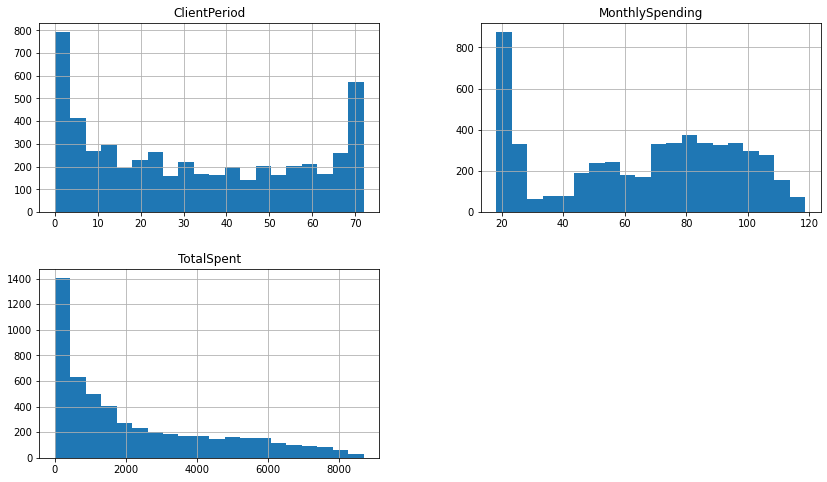

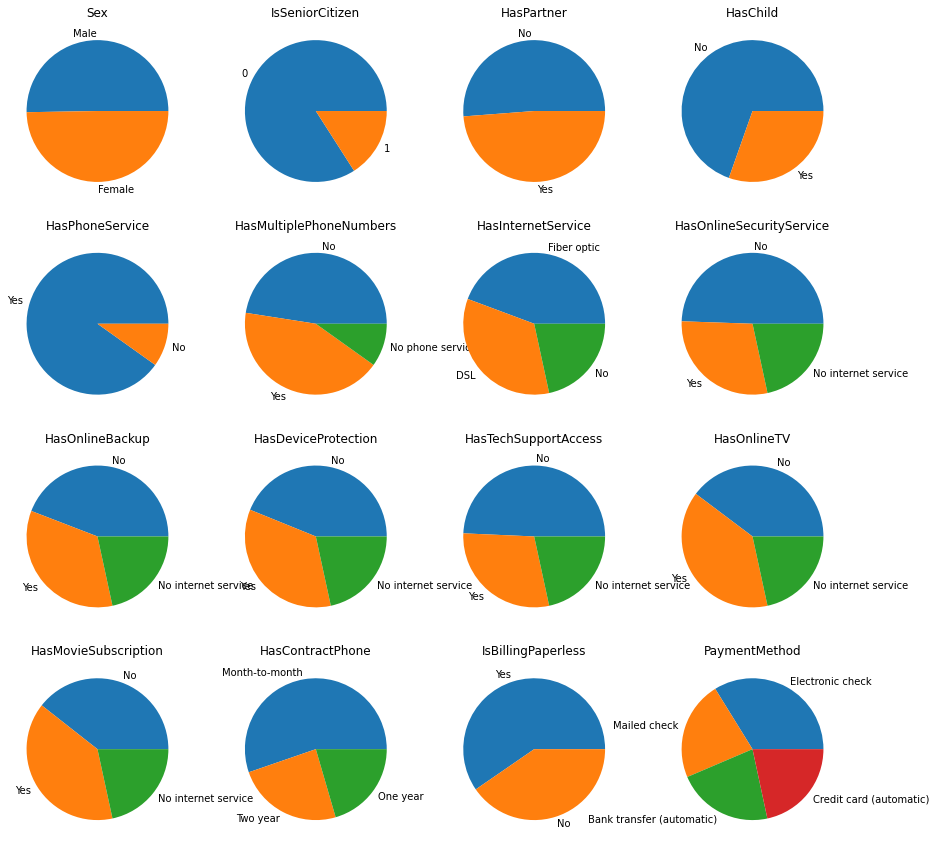

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
data[num_cols].hist(num_cols, figsize=(14, 8), bins=20)
plt.show()

# Plot graphs for categorical features
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
n = 0
for ax in axes.flat:
    ax.set(title=cat_cols[n], xticks=[], yticks=[])
    ax.pie(data[cat_cols[n]].value_counts(), labels=data[cat_cols[n]].value_counts().index.tolist())
    n += 1

# Look at the distribution of the target variable
data[target_col].value_counts()

# Class 0 is approximately 3 times larger than class 1 -> the classes are imbalanced (not symmetrical) -> using accuracy as a metric is not advisable

(Additional) If you found any errors in the data or outliers, feel free to remove them. You can experiment with data preprocessing however you like, but it won't count towards points.

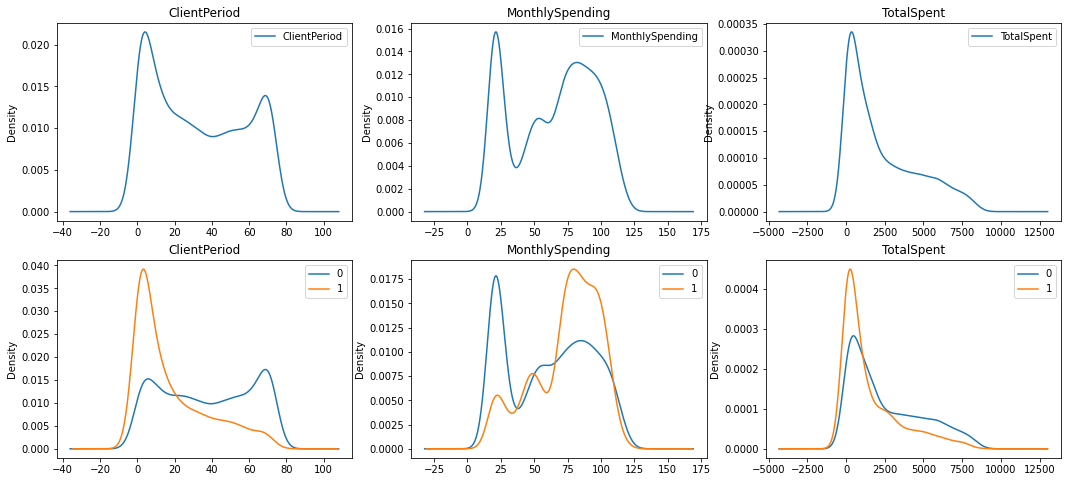

In [ ]:
# Let's look at the distribution of numerical features and their patterns
num_cols_t = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Churn']
fig, axs = plt.subplots(ncols=len(num_cols_t)-1, nrows=2, figsize=(18,8))
for j, col in enumerate(num_cols_t):
    if col != 'Churn':
        data[col].plot(kind='kde', ax=axs[0][j], title=col, legend=True)
        data[num_cols_t].groupby("Churn")[col].plot(kind='kde', ax=axs[1][j], title=col, legend=True)

## Applying Linear Models (3 points)

1) Preprocess the data to apply LogisticRegression. Normalize numerical features and encode categorical features using one-hot encoding.

2) Using cross-validation or train/test split, test different values of the hyperparameter C and choose the best one (you can test C=100, 10, 1, 0.1, 0.01, 0.001) based on the ROC-AUC metric.

If you split into train/test sets, use LogisticRegressionCV. It will automatically choose the parameter C when calling .fit(). (don't forget to pass scoring='roc_auc' to compare values of this metric during cross-validation, and refit=True to train the model on the entire dataset with the best parameter C).

(More advanced) If you use cross-validation, you need to combine data transformations and LogisticRegression into one Pipeline using make_pipeline, as done in the second seminar. Then, pass the pipeline to GridSearchCV. For one-hot encoding, you can use a combination of LabelEncoder + OneHotEncoder (first convert strings to numbers, and then convert numbers to one-hot vectors).

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# Use one-hot encoding for categorical features
dummy_features = pd.get_dummies(data[cat_cols])

X = pd.concat([data[num_cols], dummy_features], axis=1)
X_origin = data.iloc[:,:-1]
y = data['Churn']

# Check the contents of X
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [ ]:
# Split the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Let's try logistic regression as our model
model = LogisticRegressionCV(scoring='roc_auc',refit=True )
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
roc_auc_score(y_test, test_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6849054774152437

In [ ]:
# Using GridSearch
params = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
          "penalty":["l1","l2", "elasticnet"],
          "solver":["lbfgs", "saga"],
          "random_state":[42],
          "class_weight":[{0:1,1:3}, {0:1,1:2}]
         }
model = LogisticRegression()
model_cv = GridSearchCV(model, param_grid=params,cv=7)
model_cv.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mode

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 2}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [42], 'solver': ['lbfgs', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [ ]:
print("best parameters: ", model_cv.best_params_)
print("best_score: ", model_cv.best_score_)
test_pred = model_cv.predict(X_test)
roc_auc_score(y_test, test_pred)

best parameters:  {'C': 10, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
best_score:  0.7805975640560991


0.726574837690823

In [ ]:
# Let's try tuning hyperparameters for models using grid search with cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='f1',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']

    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()

    return means, error

In [ ]:
# Let's try k-nearest neighbors and decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1958s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.8s finished


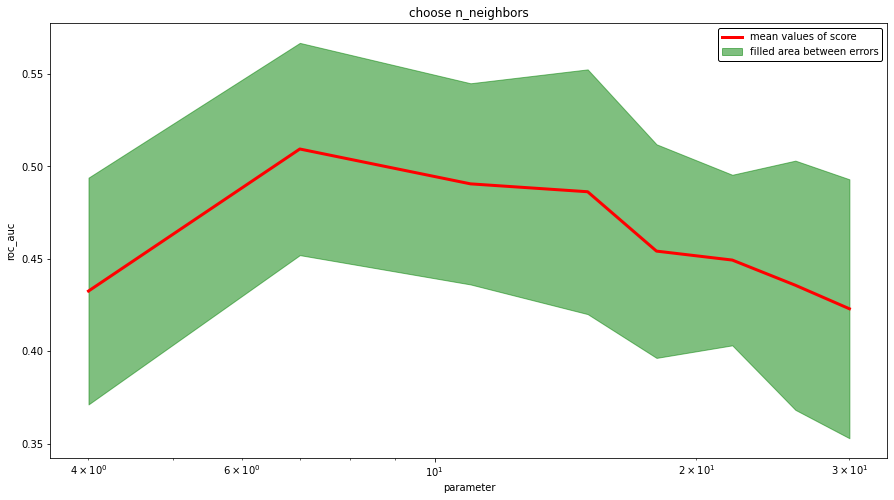

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0338s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0469s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1080s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    2.5s finished


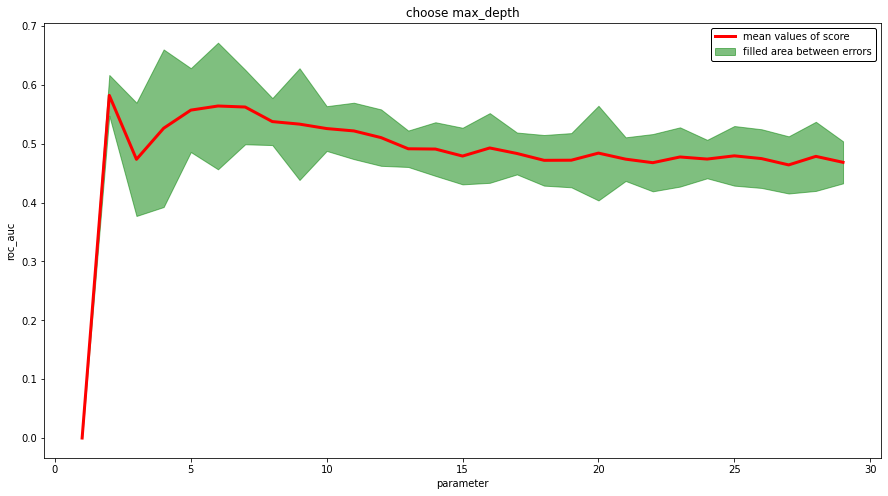

In [ ]:
for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

# We found that the k-nearest neighbors algorithm performs worse than the decision tree for any value (except for decision trees of depth one)
# For the decision tree, the optimal depth is approximately 6

In [ ]:
model = KNeighborsClassifier(n_neighbors=15, leaf_size=30)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
roc_auc_score(y_test, test_pred)

0.6318444602469501

In [ ]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
roc_auc_score(y_test, test_pred)

0.6794035888105946

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

In [ ]:
# Let's try random forest
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []

    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]

    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]

    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_

    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

    scores = np.array(scores)

    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

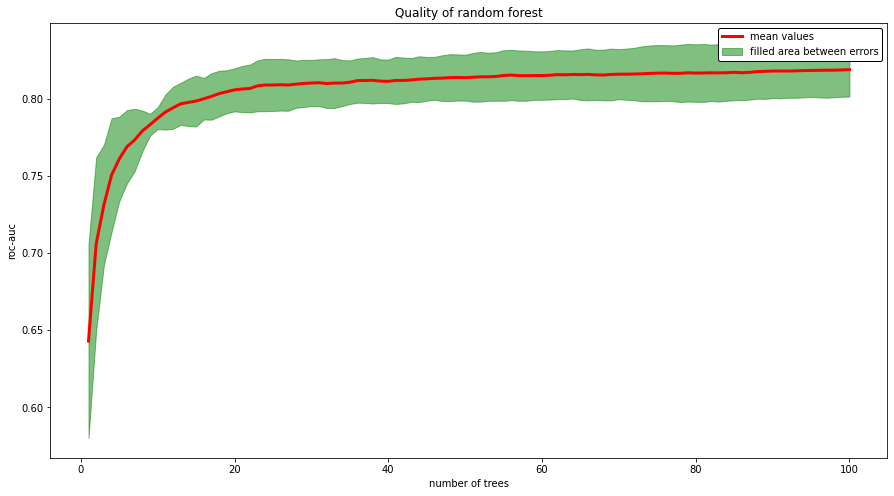

In [ ]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values,
                 mean_cross_val_score - 2 * std_cross_val_score,
                 mean_cross_val_score + 2 * std_cross_val_score,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=450, max_depth=8)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
roc_auc_score(y_test, test_pred)

0.6795028675390881

In [ ]:
params = {'max_depth': [i for i in range(3, 7)],
          'min_samples_split': [i for i in range(4, 7)],
          'max_features': [i for i in range(7, 15)]
          }

# Initialize random forest with grid search over the specified parameters
gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, verbose=1, cv=5)
gs.fit(X_train, y_train)

# best_params_ contains the best selected parameters, best_score_ is the best quality
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  4.0min finished


{'max_depth': 6, 'max_features': 12, 'min_samples_split': 6}
0.8094674556213018


List the best quality and the parameters you managed to achieve.

The best quality achieved was with the RandomForestClassifier model (ROC-AUC=0.80) with parameters 'max_depth': 6, 'max_features': 14, 'min_samples_split': 5.

## Applying Gradient Boosting (2 points)

If you want to get points for an accurate answer, you should try gradient boosting. Often, gradient boosting with default parameters will give you 80% of the result with 20% effort.

We will use CatBoost, so we don't need to encode categorical features. CatBoost will do it for us (you need to pass cat_features=cat_cols in .fit()). And numerical features do not need to be normalized for tree-based models.

1) Split the dataset into train/valid. Test CatBoost with default parameters.

2) Test different values of the number of trees and learning rate parameters and choose the best combination based on the ROC-AUC metric.

(Additional) There are some difficulties in using CatBoostClassifier with GridSearchCV, so we don't ask you to use cross-validation. But you can try.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
X_train, y_train = data[feature_cols], data[target_col]
X_train_catboost, X_valid_catboost, y_train_catboost, y_valid_catboost = train_test_split(X_train, y_train, train_size=0.8, random_state=42)

In [ ]:
boosting_model_s = CatBoostClassifier(n_estimators=2000, cat_features=cat_cols, eval_metric='AUC')

boosting_model_s.fit(X_train_catboost, y_train_catboost)

y_train_predicted = boosting_model_s.predict_proba(X_train_catboost)[:, 1]
y_valid_predicted = boosting_model_s.predict_proba(X_valid_catboost)[:, 1]

Learning rate set to 0.010095
0:	total: 18.1ms	remaining: 36.2s
1:	total: 31.2ms	remaining: 31.2s
2:	total: 44.8ms	remaining: 29.8s
3:	total: 58.8ms	remaining: 29.3s
4:	total: 74.4ms	remaining: 29.7s
5:	total: 88.7ms	remaining: 29.5s
6:	total: 104ms	remaining: 29.5s
7:	total: 117ms	remaining: 29.1s
8:	total: 122ms	remaining: 26.9s
9:	total: 139ms	remaining: 27.6s
10:	total: 153ms	remaining: 27.7s
11:	total: 169ms	remaining: 28s
12:	total: 184ms	remaining: 28.1s
13:	total: 202ms	remaining: 28.7s
14:	total: 218ms	remaining: 28.8s
15:	total: 232ms	remaining: 28.8s
16:	total: 246ms	remaining: 28.7s
17:	total: 258ms	remaining: 28.4s
18:	total: 273ms	remaining: 28.4s
19:	total: 285ms	remaining: 28.2s
20:	total: 298ms	remaining: 28.1s
21:	total: 311ms	remaining: 28s
22:	total: 323ms	remaining: 27.8s
23:	total: 336ms	remaining: 27.7s
24:	total: 350ms	remaining: 27.7s
25:	total: 359ms	remaining: 27.3s
26:	total: 375ms	remaining: 27.4s
27:	total: 389ms	remaining: 27.4s
28:	total: 406ms	remaining

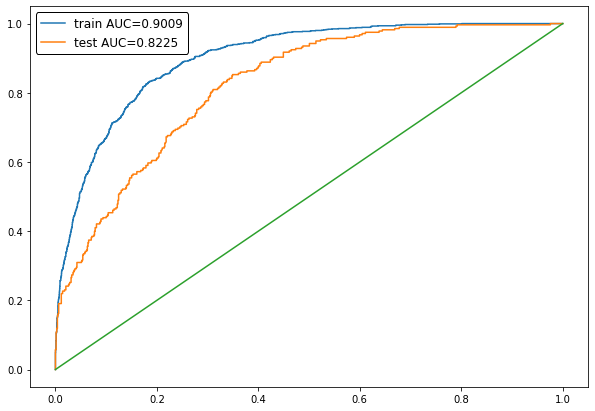

In [ ]:
from sklearn.metrics import roc_curve
train_auc = roc_auc_score(y_train_catboost, y_train_predicted)
test_auc = roc_auc_score(y_valid_catboost, y_valid_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_catboost, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_valid_catboost, y_valid_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
#Trying GridSearch
model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC')

grid = {'learning_rate': [0.01, 0.03],
        'depth': [2, 4, 6, 10],
        'l2_leaf_reg': np.linspace(0, 5, 20)}

grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8729484314
bestIteration = 917

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8729484	best: 0.8729484 (0)	total: 4.64s	remaining: 12m 17s

bestTest = 0.8745820436
bestIteration = 284

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8745820	best: 0.8745820 (1)	total: 9.15s	remaining: 12m 2s

bestTest = 0.8734117658
bestIteration = 998

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8734118	best: 0.8745820 (1)	total: 13.7s	remaining: 11m 55s

bestTest = 0.8732923497
bestIteration = 315

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8732923	best: 0.8745820 (1)	total: 18.3s	remaining: 11m 5

In [ ]:
grid_search_result["params"]

{'depth': 2, 'l2_leaf_reg': 0.0, 'learning_rate': 0.03}

In [ ]:
best_m = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', depth=2, l2_leaf_reg=0.0, learning_rate=0.03)
best_m.fit(X_train, y_train)
y_train_predicted_cv = best_m.predict_proba(X_train)[:, 1]

0:	total: 6.51ms	remaining: 6.5s
1:	total: 13.7ms	remaining: 6.86s
2:	total: 19.5ms	remaining: 6.5s
3:	total: 26ms	remaining: 6.47s
4:	total: 31.2ms	remaining: 6.21s
5:	total: 36.4ms	remaining: 6.03s
6:	total: 42ms	remaining: 5.96s
7:	total: 47.2ms	remaining: 5.86s
8:	total: 52.6ms	remaining: 5.79s
9:	total: 58.2ms	remaining: 5.76s
10:	total: 63.5ms	remaining: 5.71s
11:	total: 69ms	remaining: 5.68s
12:	total: 74.5ms	remaining: 5.66s
13:	total: 80.3ms	remaining: 5.66s
14:	total: 85.4ms	remaining: 5.61s
15:	total: 91ms	remaining: 5.6s
16:	total: 96.5ms	remaining: 5.58s
17:	total: 102ms	remaining: 5.55s
18:	total: 107ms	remaining: 5.54s
19:	total: 112ms	remaining: 5.48s
20:	total: 117ms	remaining: 5.47s
21:	total: 123ms	remaining: 5.46s
22:	total: 129ms	remaining: 5.47s
23:	total: 133ms	remaining: 5.42s
24:	total: 138ms	remaining: 5.39s
25:	total: 142ms	remaining: 5.33s
26:	total: 147ms	remaining: 5.3s
27:	total: 151ms	remaining: 5.26s
28:	total: 156ms	remaining: 5.22s
29:	total: 161ms	re

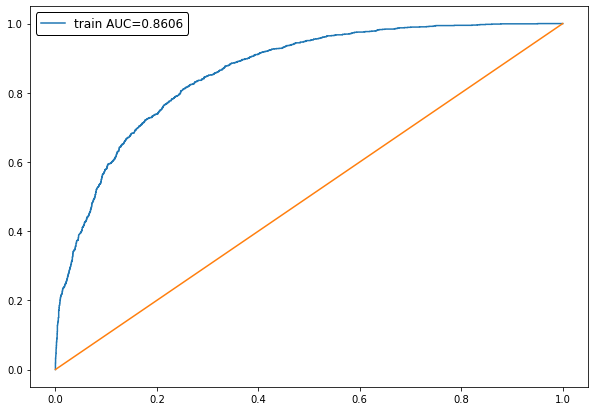

In [ ]:
train_auc_cv = roc_auc_score(y_train, y_train_predicted_cv)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted_cv)[:2], label='train AUC={:.4f}'.format(train_auc_cv))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
# Let's try different parameters for CatBoost using GridSearch
model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC')

grid = {'learning_rate': np.linspace(0.01, 0.03, 4),
        'depth': [1, 2, 3],
        'random_strength': np.linspace(0.5, 1.5, 3),
        'bagging_temperature': np.linspace(0, 2, 4)}

grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       cv=10,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.874073331
bestIteration = 997

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8740733	best: 0.8740733 (0)	total: 3.12s	remaining: 7m 26s

bestTest = 0.8743599297
bestIteration = 716

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8743599	best: 0.8743599 (1)	total: 6.09s	remaining: 7m 12s

bestTest = 0.8746895181
bestIteration = 537

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8746895	best: 0.8746895 (2)	total: 9.17s	remaining: 7m 10s

bestTest = 0.8741234858
bestIteration = 402

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8741235	best: 0.8746895 (2)	total: 12.1s	remaining: 7m 4s

b

In [ ]:
grid_search_result["params"]

{'bagging_temperature': 0.0,
 'depth': 1,
 'learning_rate': 0.02333333333333333,
 'random_strength': 1.0}

In [ ]:
best_m = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', depth=1, l2_leaf_reg=0.0, random_strength=1.0, bagging_temperature=0.0, learning_rate=0.02333333333333333)
best_m.fit(X_train, y_train)
y_train_predicted_cv = best_m.predict_proba(X_train)[:, 1]

0:	total: 4.26ms	remaining: 4.26s
1:	total: 8.66ms	remaining: 4.32s
2:	total: 12.1ms	remaining: 4.01s
3:	total: 15.4ms	remaining: 3.84s
4:	total: 19.7ms	remaining: 3.92s
5:	total: 23.3ms	remaining: 3.86s
6:	total: 26.7ms	remaining: 3.79s
7:	total: 30ms	remaining: 3.72s
8:	total: 33.2ms	remaining: 3.65s
9:	total: 36.3ms	remaining: 3.59s
10:	total: 39.5ms	remaining: 3.55s
11:	total: 42.8ms	remaining: 3.52s
12:	total: 46.1ms	remaining: 3.5s
13:	total: 49.1ms	remaining: 3.46s
14:	total: 52.1ms	remaining: 3.42s
15:	total: 55.4ms	remaining: 3.41s
16:	total: 58.6ms	remaining: 3.39s
17:	total: 61.6ms	remaining: 3.36s
18:	total: 65ms	remaining: 3.35s
19:	total: 68ms	remaining: 3.33s
20:	total: 71.1ms	remaining: 3.31s
21:	total: 74.5ms	remaining: 3.31s
22:	total: 77.5ms	remaining: 3.29s
23:	total: 80.9ms	remaining: 3.29s
24:	total: 84.2ms	remaining: 3.28s
25:	total: 87.3ms	remaining: 3.27s
26:	total: 90.7ms	remaining: 3.27s
27:	total: 94.1ms	remaining: 3.27s
28:	total: 97.2ms	remaining: 3.26s
29

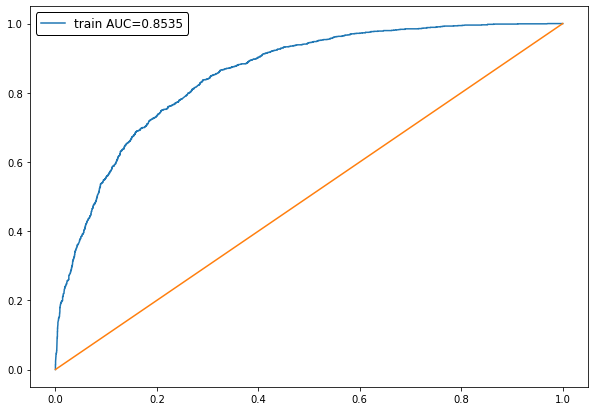

In [ ]:
train_auc_cv = roc_auc_score(y_train, y_train_predicted_cv)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted_cv)[:2], label='train AUC={:.4f}'.format(train_auc_cv))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

List the best quality and the parameters you managed to achieve.

The best quality is 0.85 with parameters 'bagging_temperature' = 0.0, 'depth' = 1, 'learning_rate' = 0.02333333333333333, 'random_strength' = 1.0

# Predictions

In [ ]:
# Data preprocessing
uploaded = files.upload()
X_test = pd.read_csv('./test.csv')

Saving test.csv to test (1).csv


In [ ]:
X_test.isna().sum()
X_test.where(X_test != ' ', inplace=True)
X_test.where(X_test != '\t', inplace=True)
X_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [ ]:
ind_test = np.where(pd.isnull(X_test))
ind_test

(array([177, 767]), array([2, 2]))

In [ ]:
model_2 = CatBoostRegressor(cat_features=cat_cols)
train_2_X = X_test[feature_cols][X_test.TotalSpent.isna() == False].drop(["TotalSpent"], axis=1)
train_2_y = X_test[feature_cols][X_test.TotalSpent.isna() == False].TotalSpent
test_2_X = X_test[feature_cols][X_test.TotalSpent.isna()].drop(["TotalSpent"], axis=1)
model_2.fit(train_2_X, train_2_y)

Learning rate set to 0.043158
0:	learn: 2172.3735268	total: 10.1ms	remaining: 10.1s
1:	learn: 2091.8716723	total: 21.5ms	remaining: 10.7s
2:	learn: 2011.5225206	total: 29.5ms	remaining: 9.8s
3:	learn: 1935.6134625	total: 37.7ms	remaining: 9.39s
4:	learn: 1860.1073515	total: 46ms	remaining: 9.16s
5:	learn: 1791.3786935	total: 54.8ms	remaining: 9.08s
6:	learn: 1721.8291773	total: 63.8ms	remaining: 9.05s
7:	learn: 1661.6346594	total: 71.7ms	remaining: 8.89s
8:	learn: 1597.6816289	total: 77.3ms	remaining: 8.51s
9:	learn: 1542.3078779	total: 86.5ms	remaining: 8.56s
10:	learn: 1485.1376742	total: 95.4ms	remaining: 8.58s
11:	learn: 1430.7214256	total: 111ms	remaining: 9.12s
12:	learn: 1377.7178872	total: 122ms	remaining: 9.29s
13:	learn: 1325.2357860	total: 131ms	remaining: 9.19s
14:	learn: 1281.2161046	total: 139ms	remaining: 9.15s
15:	learn: 1235.8451459	total: 147ms	remaining: 9.05s
16:	learn: 1193.5899134	total: 154ms	remaining: 8.93s
17:	learn: 1155.7754008	total: 162ms	remaining: 8.86s


In [ ]:
predict_test = model_2.predict(test_2_X)

In [ ]:
for i in range(len(predict_test)):
  X_test.iloc[ind_test[0][i], ind_test[1][i]] = predict_test[i]

In [ ]:
X_test.TotalSpent.isna().sum()

0

In [ ]:
best_model = best_m

In [ ]:
best_model.predict_proba(X_test)[:, 1]

array([0.04755751, 0.66262322, 0.64562006, ..., 0.77915107, 0.53263084,
       0.01761412])

In [ ]:
uploaded = files.upload()
submission = pd.read_csv('./submission.csv')
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./submission.csv', index=False)
files.download('my_submission.csv')

Saving submission.csv to submission (9).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kaggle (5 points)

How to set points:

1) 1 >= roc auc > 0.84 is 5 points

2) 0.84 >= roc auc > 0.7 is 3 points

3) 0.7 >= roc auc > 0.6 is 1 point

4) 0.6 >= roc auc is 0 points


To complete the task, follow these steps.
* Register on the platform [kaggle.com ](kaggle.com ). The grading process will take place when summarizing the final rating. Please enter your first and last name in the Name_name format in the Team -> Team name tab (it is important that the first and last name match the data on Stepik).
* Train the model, get a file with answers in the format .csv and submit it to the competition. Try and experiment. Please note that you can make up to 20 attempts at kaggle per day.
* After the end of the competition, send the final laptop with the solution to the step.
* After the deadline, check the parcels of other participants according to the criteria. To do this, go to stepik, download their laptop and check the speed in the competition.